## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(f"The number of unique mice is: {combined_mouse_data['Mouse ID'].nunique()}" )
print(f"The number of mice records is: {len(combined_mouse_data['Mouse ID'])}")

The number of unique mice is: 249
The number of mice records is: 1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_rows = combined_mouse_data[combined_mouse_data.duplicated(["Mouse ID", "Timepoint"])]
duplicated_rows.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = combined_mouse_data[combined_mouse_data["Mouse ID"] == "g989"]
duplicate_mouse_id.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_mouse_data[combined_mouse_data["Mouse ID"] != "g989"]
clean_mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.

print(f"The number of unique mice is: {clean_mouse_data['Mouse ID'].nunique()}" )

The number of unique mice is: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.

In [8]:
mean_tumor_volumes = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volumes = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variances = clean_mouse_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_volume_stds = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sems = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


In [9]:
summary_stats_tbl_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volumes,
                                     "Median Tumor Volume": median_tumor_volumes,
                                     "Tumor Volume Variance": tumor_volume_variances,
                                     "Tumor Volume Std. Dev.": tumor_volume_stds,
                                     "Tumor Volume Std. Err.": tumor_volume_sems})
summary_stats_tbl_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_tbl_df =  clean_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_stats_tbl_df 


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
drug_regimen_measurements = clean_mouse_data["Drug Regimen"].value_counts()
drug_regimen_measurements


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

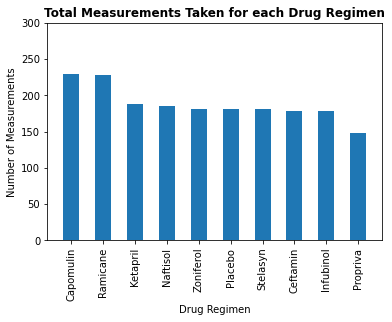

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_regimen_measurements.plot.bar()

plt.title("Total Measurements Taken for each Drug Regimen", fontweight=750, size = "large")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.xticks(rotation=90)
plt.xlim(-0.75, 9.75)
plt.ylim(0, 300)
           
plt.show()
plt.tight_layout()


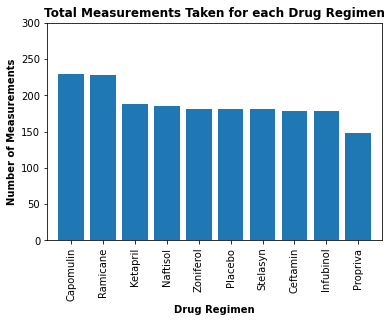

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_regimen_measurements = clean_mouse_data["Drug Regimen"].value_counts()

plt.bar(drug_regimen_measurements.index.values, drug_regimen_measurements.values)

plt.title("Total Measurements Taken for each Drug Regimen", fontweight=750, size = "large")

plt.xlabel("Drug Regimen", fontweight=600, size="medium")
plt.ylabel("Number of Measurements", fontweight=600, size="medium")
plt.xticks(rotation=90)

plt.xlim(-0.75, 9.75)
plt.ylim(0, 300)
           
plt.show()


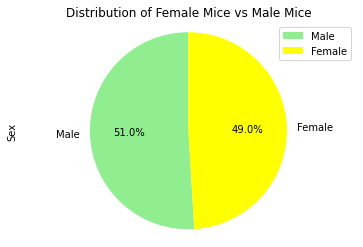

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_counts = clean_mouse_data["Sex"].value_counts()
sex_counts.plot.pie(y= "Sex", autopct="%1.1f%%", title = "Distribution of Female Mice vs Male Mice", 
                    colors = ["lightgreen", "yellow"], startangle=90)
                  
plt.legend()
plt.axis("equal")
plt.show()


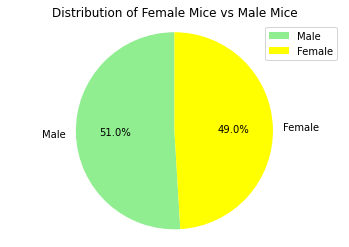

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_counts.values, labels=sex_counts.index.values, autopct="%1.1f%%",
        colors = ["lightgreen", "yellow"], startangle=90)

plt.title("Distribution of Female Mice vs Male Mice", fontweight = "medium", fontsize = "12")
plt.legend()
 
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumorvolume_df = clean_mouse_data.groupby(["Mouse ID"]).max()
max_tumorvolume_df = max_tumorvolume_df.reset_index()
max_tumorvolume_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [17]:
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_data_df = pd.merge(max_tumorvolume_df[["Mouse ID","Timepoint"]], clean_mouse_data,on=["Mouse ID","Timepoint"],how="left")
merged_data_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume_for_selected_treatment = merged_data_df.loc[merged_data_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(final_tumor_volume_for_selected_treatment)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume_for_selected_treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volume_for_selected_treatment.loc[(final_tumor_volume_for_selected_treatment < lower_bound) |
                                                             (final_tumor_volume_for_selected_treatment > upper_bound)]
    print(f"Potential outliers for {drug} : {outliers}")


Potential outliers for Capomulin : Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane : Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin : Series([], Name: Tumor Volume (mm3), dtype: float64)


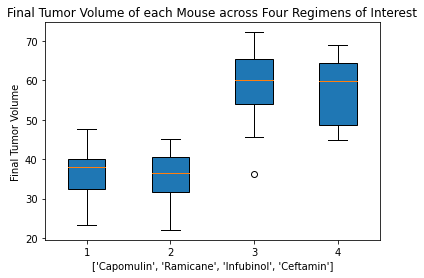

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of each Mouse across Four Regimens of Interest")
ax1.set_ylabel("Final Tumor Volume")
ax1.set_xlabel(treatment_list)
ax1.boxplot(tumor_volume_list, patch_artist=True)

plt.show()


## Line and Scatter Plots

In [20]:
capomulin_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin", :]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


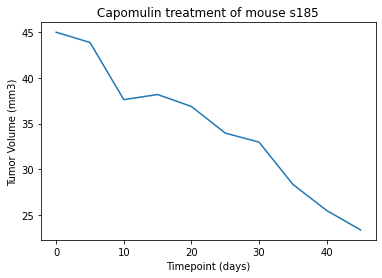

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# I selected Mouse ID s185
                       
capomulin_average_df = capomulin_df.groupby(["Mouse ID"]).mean()
s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]

plt.plot(s185_df["Timepoint"], s185_df["Tumor Volume (mm3)"])
 
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse s185")
plt.show()


In [22]:
capomulin_average_df = capomulin_df.groupby(["Mouse ID"]).mean()
capomulin_average_df.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


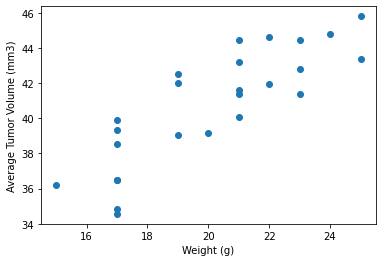

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter(capomulin_average_df["Weight (g)"], capomulin_average_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

st.pearsonr(capomulin_average_df["Weight (g)"], capomulin_average_df["Tumor Volume (mm3)"])


(0.8419363424694716, 1.3225722434712883e-07)

In [25]:
capomulin_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin"]
capomulin_average_df = capomulin_df.groupby(["Mouse ID"]).mean()
corr=round(st.pearsonr(capomulin_average_df["Weight (g)"],capomulin_average_df["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")


The correlation between mouse weight and the average tumor volume is 0.84


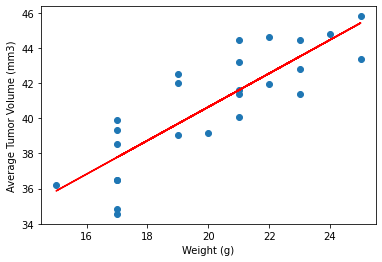

In [26]:
model = st.linregress(capomulin_average_df["Weight (g)"], capomulin_average_df["Tumor Volume (mm3)"])
y_values = capomulin_average_df["Weight (g)"]*model[0]+model[1]
plt.scatter(capomulin_average_df["Weight (g)"],capomulin_average_df["Tumor Volume (mm3)"])
plt.plot(capomulin_average_df["Weight (g)"],y_values,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()